#### ahora procedere a hacer un eda con los datos limpios, se buscara patrones y cruce de datos para sacar concluciones.

#### importaciones

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [57]:
# se importan ambos dataset limpios
hechos = hechos = pd.read_csv(r'datasets\homicidios_hechos_limpio.csv')

victimas = pd.read_csv(r'datasets\homicidios_victimas_limpio.csv')

#### empezare con el eda de los archivos hechos

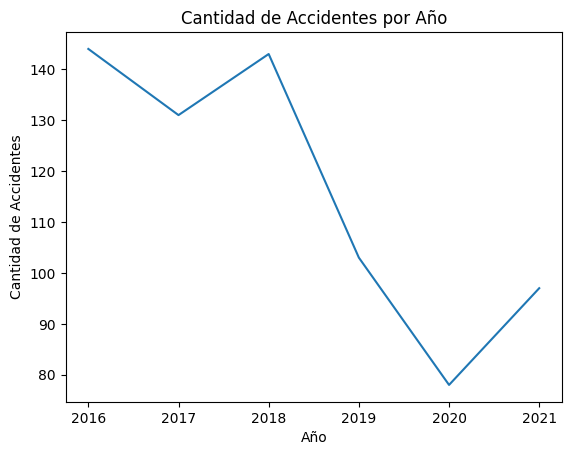

' \nEn el siguiente gráfico se observa una reducción drástica en la cantidad de accidentes durante el año 2020. \nEsta disminución coincide con el año de la pandemia de COVID-19 por lo que no es de extrañar el resultado, ya que los datos\nextraidos son de caracter publico.\n'

In [58]:
# Agrupar por año y contar la cantidad de accidentes
df_anio = hechos.groupby('Anio').size()

# cantidad de accidentes por año
plt.plot(df_anio)
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes por Año')
plt.show()

""" 
En el siguiente gráfico se observa una reducción drástica en la cantidad de accidentes durante el año 2020. 
Esta disminución coincide con el año de la pandemia de COVID-19 por lo que no es de extrañar el resultado, ya que los datos
extraidos son de caracter publico.
"""

C:\Users\junio\AppData\Local\Temp\ipykernel_21864\1051142608.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hechos_filtrados['dia_semana'] = hechos_filtrados['Fecha'].dt.day_name()


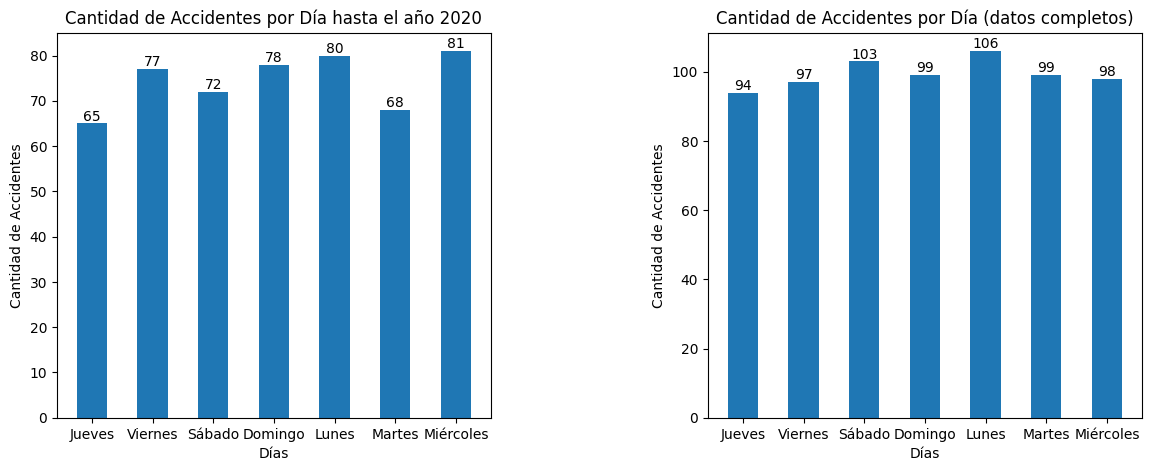

In [59]:
"""
En el primer grafico se excluyo todos los datos hasta el año 2020 por motivos de peso(COVID-19), 
que puedan llegar a modificar los resultados.
En Argentina, Buenos Aires existen boliche/pubs/discotecas que abren viernes, sabados y domingos por lo que podria haber 
cierta coorrelacion entre los datos y el echo mencionado.
"""
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 5))  # Ancho x Alto

# Crear dos subplots, uno al lado del otro
ax1 = plt.subplot(121)  # Crea el primer subplot en la primera fila y primera columna
ax2 = plt.subplot(122)  # Crea el segundo subplot en la primera fila y segunda columna

# Graficar el primer gráfico (hasta el año 2020) en el subplot 1
hechos_2 = hechos
hechos_2['Fecha'] = pd.to_datetime(hechos['Fecha'])
fecha_limite = pd.Timestamp('2019-12-31')
hechos_filtrados = hechos_2[hechos_2['Fecha'] <= fecha_limite]
hechos_filtrados['dia_semana'] = hechos_filtrados['Fecha'].dt.day_name()
df_dia = hechos_filtrados.groupby('dia_semana').size()
df_dia = df_dia.reindex(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'])
nombres_dias_espanol = {'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles', 'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'}
df_dia.index = df_dia.index.map(nombres_dias_espanol)

ax1.bar(df_dia.index, df_dia, width=0.5)
for i, v in enumerate(df_dia):
    ax1.text(i, v, str(v), ha='center', va='bottom')

ax1.set_xlabel('Días')
ax1.set_ylabel('Cantidad de Accidentes')
ax1.set_title('Cantidad de Accidentes por Día hasta el año 2020')

# Graficar el segundo gráfico (datos completos) en el subplot 2
hechos_2['Fecha'] = pd.to_datetime(hechos['Fecha'])
hechos_2['dia_semana'] = hechos_2['Fecha'].dt.day_name()
hechos_2['Tipo_Dia'] =hechos_2['dia_semana'].apply(lambda x: 'Dia_de_Semana' if x in ['Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday'] else 'Fin_de_Semana')
df_dia = hechos_2.groupby('dia_semana').size()
df_dia = df_dia.reindex(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'])
df_dia.index = df_dia.index.map(nombres_dias_espanol)

ax2.bar(df_dia.index, df_dia, width=0.5)
for i, v in enumerate(df_dia):
    ax2.text(i, v, str(v), ha='center', va='bottom')

ax2.set_xlabel('Días')
ax2.set_ylabel('Cantidad de Accidentes')
ax2.set_title('Cantidad de Accidentes por Día (datos completos)')

# Ajustar el espacio entre subplots
plt.subplots_adjust(wspace=0.5)

# Mostrar el gráfico
plt.show()

C:\Users\junio\AppData\Local\Temp\ipykernel_21864\1902735986.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_homicidios['Hora'] = pd.to_datetime(df_homicidios['Hora'])
C:\Users\junio\AppData\Local\Temp\ipykernel_21864\1902735986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Hora del día', y='Cantidad de accidentes', data=data, palette='husl')


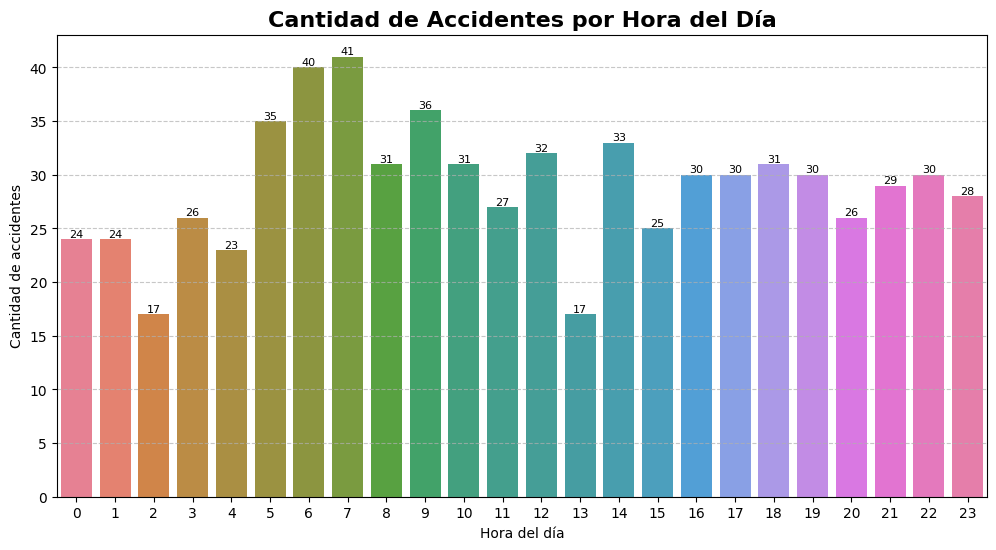

In [60]:
df_homicidios = hechos
#Convertimos la hora a datetime
df_homicidios['Hora'] = pd.to_datetime(df_homicidios['Hora'])

#Extraemos la hora del día de la columna 'Hora'
df_homicidios['Hora del día'] = df_homicidios['Hora'].dt.hour

#Contamos la cantidad de accidentes por hora del día
data = df_homicidios['Hora del día'].value_counts().sort_index().reset_index()
data.columns = ['Hora del día', 'Cantidad de accidentes']

#Creamos el gráfico de barras con colores diferentes para cada barra
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Hora del día', y='Cantidad de accidentes', data=data, palette='husl')

ax.set_title('Cantidad de Accidentes por Hora del Día', fontsize=16, weight='bold')
ax.set_xlabel('Hora del día')
ax.set_ylabel('Cantidad de accidentes')

#Se agrega el valor encima de cada barra
for index, row in data.iterrows():
    ax.text(row['Hora del día'], row['Cantidad de accidentes'], str(row['Cantidad de accidentes']),
            ha='center', va='bottom', fontsize=8, color='black')

#Se muestra el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

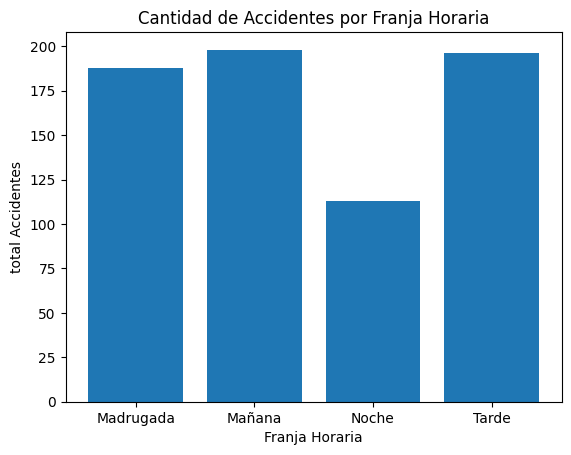

In [61]:
hechos_sin_SD = hechos[hechos['Franja_Horaria'] != 'SD']

# Agrupar por franja horaria y contar la cantidad de accidentes
df_franja_horaria = hechos_sin_SD.groupby('Franja_Horaria').size()

# Graficar una barra por cada franja horaria con la cantidad de accidentes
plt.bar(df_franja_horaria.index, df_franja_horaria)
plt.xlabel('Franja Horaria')
plt.ylabel('total Accidentes')
plt.title('Cantidad de Accidentes por Franja Horaria')
plt.show()

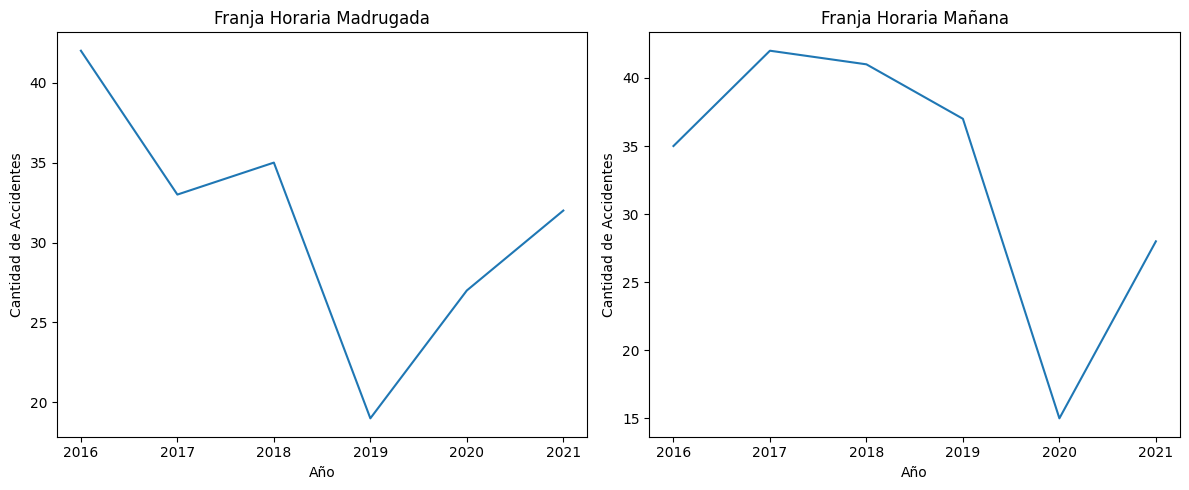

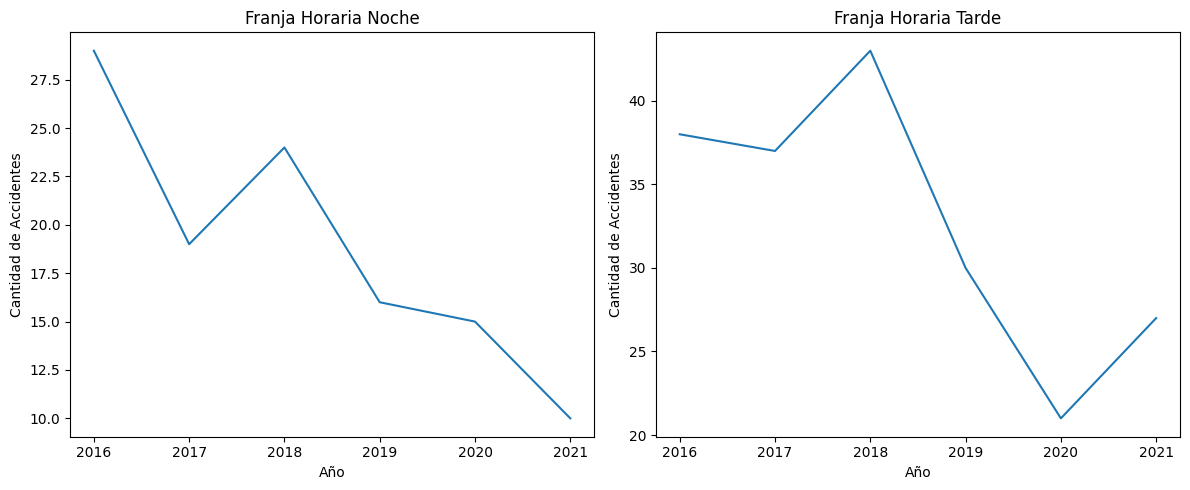

In [62]:
# Filtrar las filas para excluir aquellas con valor "SD" en la columna "Franja_Horaria"
hechos_sin_SD = hechos[hechos['Franja_Horaria'] != 'SD']

# Agrupar por año y franja horaria
df_anio_franja_horaria = hechos_sin_SD.groupby(['Anio', 'Franja_Horaria']).size()

# Obtener la lista de franjas horarias
franjas_horarias = df_anio_franja_horaria.index.levels[1]

# Iterar sobre las franjas horarias y mostrar dos gráficos por iteración
for i in range(0, len(franjas_horarias), 2):
    plt.figure(figsize=(12, 5))  # Ancho x Alto de la figura
    for j in range(2):
        if i + j < len(franjas_horarias):
            franja_horaria = franjas_horarias[i + j]
            df_franja = df_anio_franja_horaria.loc[:, franja_horaria]
            plt.subplot(1, 2, j+1)
            plt.plot(df_franja.index, df_franja)
            plt.xlabel('Año')
            plt.ylabel('Cantidad de Accidentes')
            plt.title(f'Franja Horaria {franja_horaria}')
    plt.tight_layout()
    plt.show()

In [63]:
"""
con los anteriores grafricos se puede observar que la mayor tendencia de accidentes fue de mañana, correspondiente a los horarios 
de 6 a 12 por lo que parece haber una mayor predisposicion de accidente entre esas horas.
Con los datos hasta ahora vistos se podria llegar a la conclucion de que los Lunes por la mañana ( de 6:00 a 12:00 AM) 
son el dia y el horario con mas probabilidades de tener una situacion de accidente ya sea desde la posicion de victima o perpetrador.
"""

'\ncon los anteriores grafricos se puede observar que la mayor tendencia de accidentes fue de mañana, correspondiente a los horarios \nde 6 a 12 por lo que parece haber una mayor predisposicion de accidente entre esas horas.\nCon los datos hasta ahora vistos se podria llegar a la conclucion de que los Lunes por la mañana ( de 6:00 a 12:00 AM) \nson el dia y el horario con mas probabilidades de tener una situacion de accidente ya sea desde la posicion de victima o perpetrador.\n'

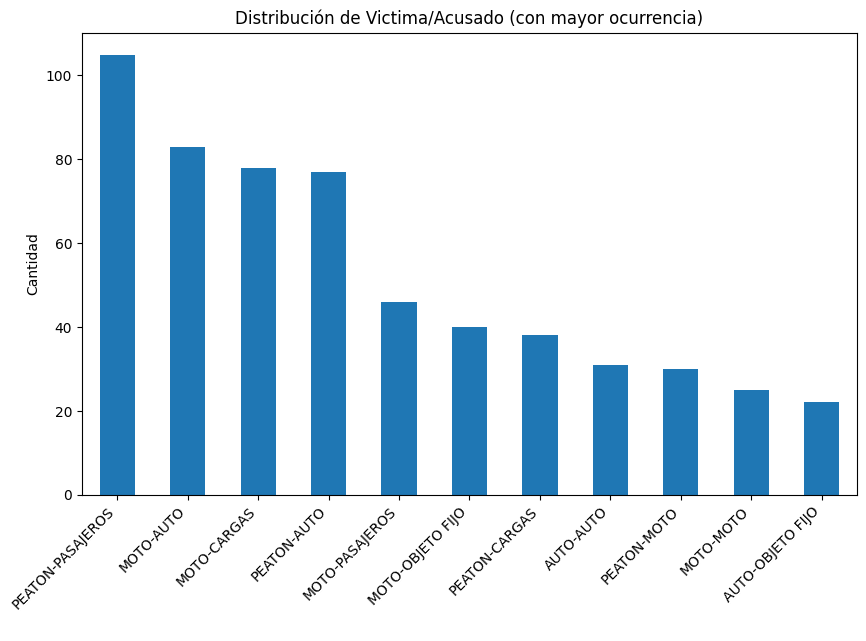

' \nanotacion: el valor "pasajeros" corresponde a cualquier vehiculo que transporte personas lesionadas \nque se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as \ny ómnibus de larga distancia\n'

In [64]:
# Obtener la cantidad de ocurrencias de cada valor en la columna "Participantes"
participantes_count = hechos['Participantes'].value_counts()

# Se filtrar los valores que tengan una cantidad de ocurrencias mayor o igual a 20 para ver los valores mas usuales
participantes_count_filtrado = participantes_count[participantes_count >= 20]

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
participantes_count_filtrado.plot(kind='bar')

# Inclinar los valores del eje x
plt.xticks(rotation=45, ha='right')

# Etiquetas y título
plt.xlabel(' ')
plt.ylabel('Cantidad')
plt.title('Distribución de Victima/Acusado (con mayor ocurrencia)')

# Mostrar el gráfico
plt.show()

# El valor de la izquierda es la victima y el de la derecha el acusado.

""" 
anotacion: el valor "pasajeros" corresponde a cualquier vehiculo que transporte personas lesionadas 
que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as 
y ómnibus de larga distancia
"""

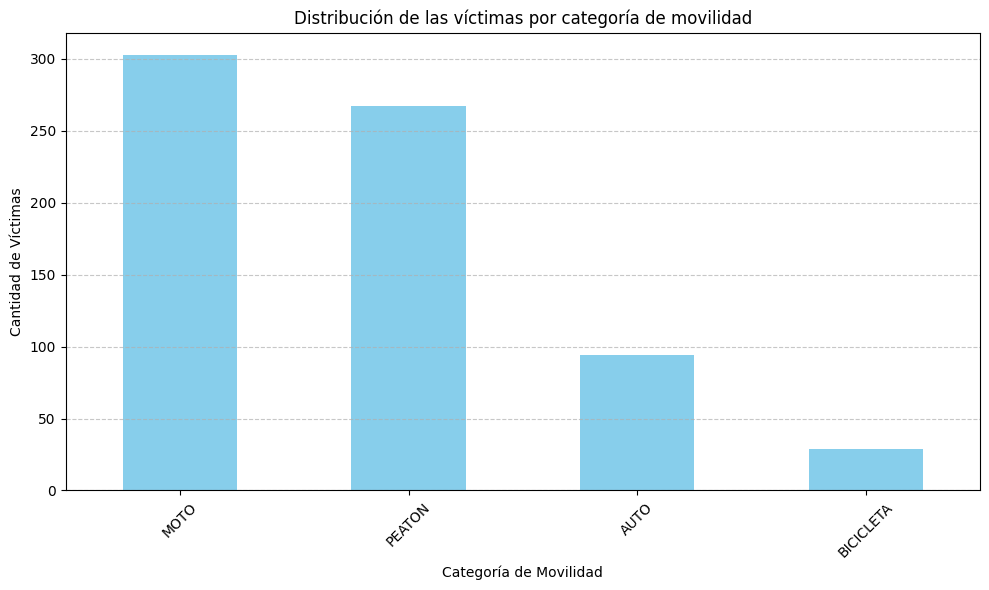

In [65]:
# en el siguiente grafico, se busca visualizar cuales son la movilidad de las victimas que fueron mas frecuentes.

# Calcular la distribución de los datos por categoría
distribucion = victimas['Victima_Movilidad'].value_counts()

# Filtrar las categorías con menos de 20 víctimas
distribucion_filtrada = distribucion[distribucion >= 20]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
distribucion_filtrada.plot(kind='bar', color='skyblue')

# Personalizar el gráfico
plt.title('Distribución de las víctimas por categoría de movilidad')
plt.xlabel('Categoría de Movilidad')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

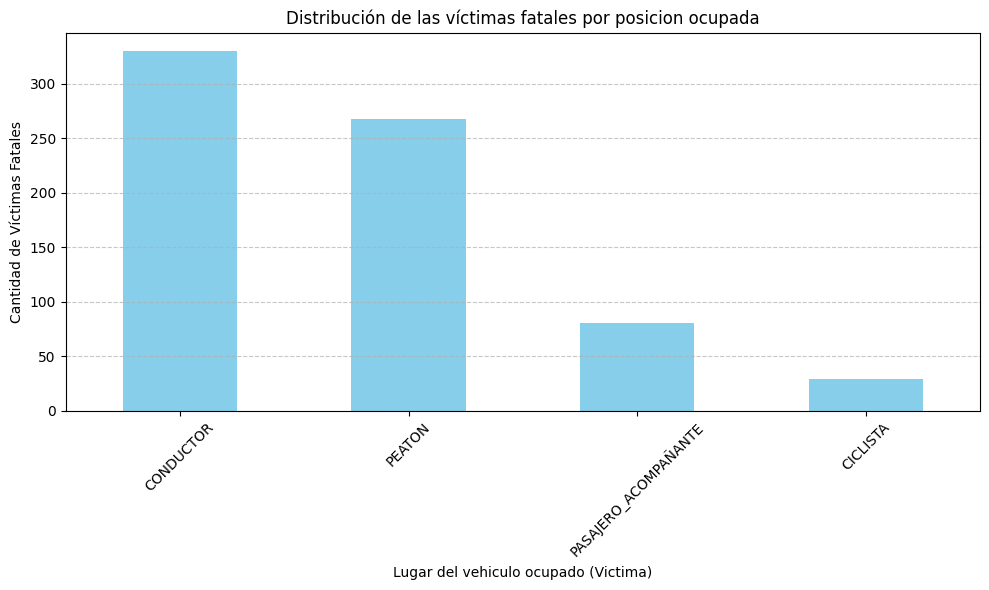

In [66]:
# Calcular la distribución de los datos por categoría
distribucion = victimas['Victima_Fatal'].value_counts()

# Se filtrar los valores que tengan una cantidad de ocurrencias mayor o igual a 20 para ver los valores mas usuales
distribucion = distribucion[distribucion >= 15]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
distribucion.plot(kind='bar', color='skyblue')

# Personalizar el gráfico
plt.title('Distribución de las víctimas fatales por posicion ocupada')
plt.xlabel('Lugar del vehiculo ocupado (Victima)')
plt.ylabel('Cantidad de Víctimas Fatales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [67]:
hechos_2 = hechos

# Eliminar filas con valores no numéricos en las columnas 'Coordenada x' y 'Coordenada y'
hechos_2 = hechos_2[pd.to_numeric(hechos_2['Coordenada x'], errors='coerce').notnull()]
hechos_2 = hechos_2[pd.to_numeric(hechos_2['Coordenada y'], errors='coerce').notnull()]

# Convertir las columnas 'Coordenada x' y 'Coordenada y' a números reales
hechos_2['Coordenada x'] = hechos_2['Coordenada x'].astype(float)
hechos_2['Coordenada y'] = hechos_2['Coordenada y'].astype(float)

# Coordenadas aproximadas de Buenos Aires, Argentina
latitud_buenos_aires = -34.6037
longitud_buenos_aires = -58.3816

# Crear un mapa centrado en Buenos Aires, Argentina
mapa = folium.Map(location=[latitud_buenos_aires, longitud_buenos_aires], zoom_start=10, control_scale=True)

# Agregar una capa de imagen satelital de OpenStreetMap
folium.TileLayer('openstreetmap').add_to(mapa)

# Iterar sobre cada fila del DataFrame
for index, row in hechos_2.iterrows():
    # Obtener las coordenadas de cada punto
    coordenada_y = row['Coordenada y']
    coordenada_x = row['Coordenada x']
    
    # Agregar un marcador en el mapa para cada punto
    folium.Marker([coordenada_y, coordenada_x]).add_to(mapa)

In [68]:
mapa

##### Se encontro errores en los datos de las columnas donde contenian las coordenadas, por lo que se corrigio los errores en ambas columnas("Coordenadas x" y "Coordenadas y"). Despues de eso se grafico los datos para ver si existe alguna tendencia. 

##### Por lo que se puede apreciar, se ve una tendencia a una zona en especifico donde esta construido la estacion de trenes (Constitucion), se saca de conclucion teniendo en cuenta el horario (6:00 a 12:00 AM), dia de mayor probabilidad de accidentes(Lunes) y la zona geografica en el cual se vizualizan en mas cantidad los datos que los accidentes son provocados por una combinacion de factores:<br> 1) personas que se dirigen a su lugar de trabajo <br> 2) personas que salen de boliches/bares/pubs y estan de vuelta a sus hogares( en posible estado de ebriedad) <br> 3) personas que trabajan de uber / pedidosYa (o aplicaciones similares)


In [69]:
### ahora seguiria con el eda del archivo Vicitmas_limpio 
victimas.head()

,Unnamed: 0,Id,Fecha,Anio,Mes,Dia,Victima_Fatal,Victima_Movilidad,Sexo,Edad
0,0,20160001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,1,20160002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2,20160003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30
3,3,20160004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18
4,4,20160005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29


C:\Users\junio\AppData\Local\Temp\ipykernel_21864\1406326054.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  victimas_2 = victimas_2[pd.to_numeric(victimas['Edad'], errors='coerce').notnull()]


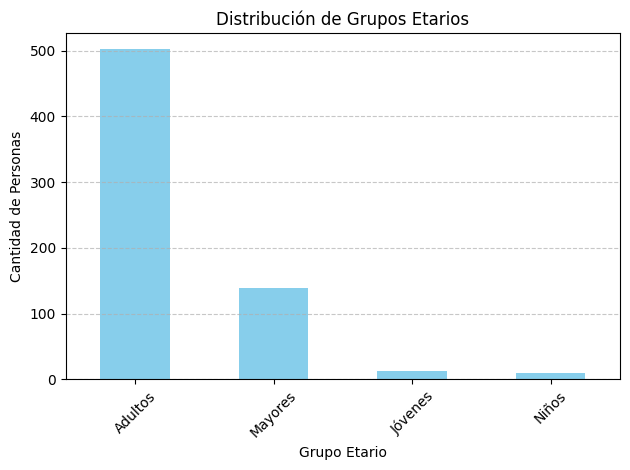

In [70]:
# se sigue con la visualizacion de las edades por grupos etareos
victimas_2 = victimas

victimas_2 = victimas_2[victimas_2['Edad'] != 'SD']

victimas_2 = victimas_2[pd.to_numeric(victimas['Edad'], errors='coerce').notnull()]

# Convertir la columna 'Edad' a números enteros
victimas_2['Edad'] = victimas_2['Edad'].astype(int)

# Función para asignar grupos etarios según las categorías definidas
def asignar_grupo_etario(edad):
    if edad <= 12:
        return 'Niños'
    elif 13 <= edad <= 17:
        return 'Jóvenes'
    elif 18 <= edad <= 59:
        return 'Adultos'
    else:
        return 'Mayores'

# Aplicar la función para crear una nueva columna 'Grupo Etario'
victimas_2['Grupo Etario'] = victimas_2['Edad'].apply(asignar_grupo_etario)

# Contar la cantidad de personas en cada grupo etario
conteo_grupo_etario = victimas_2['Grupo Etario'].value_counts()

# Graficar la distribución de grupos etarios
conteo_grupo_etario.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Grupos Etarios')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de la cuadrícula en el eje y
plt.tight_layout()  # Ajustar el diseño para evitar recorte de etiquetas
plt.show()

In [71]:
"""
En el anterior grafico se puede visualizar claramente que una edad en especifico es la mas presente, aunque como dato
no nos estaria sirviendo ya que el resultado muestra lo evidente, en el año 2020 casi el 47.3% de la poblacion argentina 
estaba en un rango de edad de 20 a 59 años (9.030.299 personas).
"""

'\nEn el anterior grafico se puede visualizar claramente que una edad en especifico es la mas presente, aunque como dato\nno nos estaria sirviendo ya que el resultado muestra lo evidente, en el año 2020 casi el 47.3% de la poblacion argentina \nestaba en un rango de edad de 20 a 59 años (9.030.299 personas).\n'

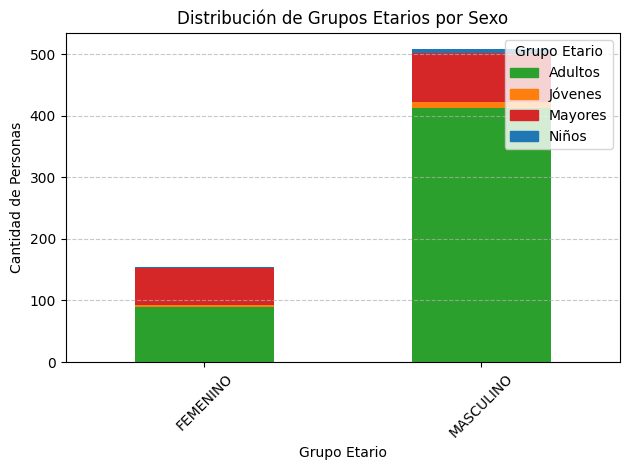

In [72]:
# Crear una copia del DataFrame 'victimas'
victimas_2 = victimas.copy()

# Eliminar las filas que contienen 'SD'
victimas_2 = victimas_2[victimas_2['Edad'] != 'SD']

# Convertir la columna 'Edad' a números enteros en el DataFrame filtrado
victimas_2['Edad'] = pd.to_numeric(victimas_2['Edad'], errors='coerce')

# Eliminar filas con valores NaN en la columna 'Edad'
victimas_2 = victimas_2.dropna(subset=['Edad'])

# Función para asignar grupos etarios según las categorías definidas
def asignar_grupo_etario(edad):
    if edad <= 12:
        return 'Niños'
    elif 13 <= edad <= 17:
        return 'Jóvenes'
    elif 18 <= edad <= 59:
        return 'Adultos'
    else:
        return 'Mayores'

# Aplicar la función para crear una nueva columna 'Grupo Etario' en el DataFrame filtrado
victimas_2['Grupo Etario'] = victimas_2['Edad'].apply(asignar_grupo_etario)

# Agrupar por Sexo y Grupo Etario, y contar la cantidad de personas en cada grupo
conteo_grupo_etario_sexo = victimas_2.groupby(['Sexo', 'Grupo Etario']).size().unstack(fill_value=0)

# Definir colores para cada grupo etario
colors = {
    'Niños': '#1f77b4',
    'Jóvenes': '#ff7f0e',
    'Adultos': '#2ca02c',
    'Mayores': '#d62728'
}

# Graficar la distribución de grupos etarios agrupados por Sexo
ax = conteo_grupo_etario_sexo.plot(kind='bar', stacked=True, color=[colors[col] for col in conteo_grupo_etario_sexo.columns])
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Grupos Etarios por Sexo')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de la cuadrícula en el eje y
plt.tight_layout()  # Ajustar el diseño para evitar recorte de etiquetas

# Crear leyenda personalizada
handles, labels = ax.get_legend_handles_labels()
unique_labels = sorted(set(labels), key=labels.index)
custom_legend = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in unique_labels]
plt.legend(custom_legend, unique_labels, title='Grupo Etario', loc='upper right')

plt.show()

##### del anterior grafico se puede llegar a la conclucion que la mayor cantidad de accidentes ocurren en el rango de edad de los adultos (18 a 59 años).<br> ademas, los accidentes tienen como caracteristica que el genero masculino parece tener mas probabilidad de ser victima de algun tipo de accidente, casi cuatro veces mas. Por lo que se podria sacar de conclucion teniendo en cuenta los dias con mas accidentes, los horarios y la distribucion de la edad. <br> Que al finalizar la salida a boliches o bares las personas son mas propensas a tener accidentes cuando estan en estado de ebriedad o bajo el efecto de alguna droga. Ademas este grafico de generos da a entender que las mujeres suelen ser mas cuidadosas al momento de moverse por la calle, mas respetuosas con las leyes de transito o suelen volver a sus hogares por otros medios por ej: uber, remis, etc
